In [2009]:
!conda activate "C:\Users\admin\Documents\Personal Work\Projects\Project credit score classification\credit_score"

# EDA and Data Selection

In [2010]:
import pandas as pd

In [2011]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

C:\Users\admin\AppData\Local\Temp\ipykernel_7516\4274157143.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


**merge the data I**

In [2012]:
df_merged = pd.concat([df_train,df_test],axis=0).copy()
df_merged.reset_index(drop=True,inplace=True)

In [2013]:
d_cols=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df = df_merged.drop(columns=d_cols,axis=1).copy()

In [2014]:
drop_df.isnull().sum(axis=0)

Age                           0
Occupation                    0
Annual_Income                 0
Delay_from_due_date           0
Num_of_Delayed_Payment    10500
Outstanding_Debt              0
Credit_History_Age        13500
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Payment_Behaviour             0
Monthly_Balance            1762
Credit_Score              50000
dtype: int64

In [2015]:
drop_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [2016]:
subset=['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance']
drop_na = drop_df.dropna(subset=subset).copy()
drop_na.isnull().sum()

Age                           0
Occupation                    0
Annual_Income                 0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Outstanding_Debt              0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Payment_Behaviour             0
Monthly_Balance               0
Credit_Score              41853
dtype: int64

# Transforming the Data

In [2017]:
import numpy as np

In [2018]:
char_columns = list(drop_na.columns.values)
char_columns.remove('Payment_Behaviour')
char_columns.remove('Delay_from_due_date')
char_columns.remove('Total_EMI_per_month')
char_columns.remove('Credit_Score')

float_columns = ['Annual_Income','Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
int_columns = ['Age','Delay_from_due_date','Num_of_Delayed_Payment']
char_columns


['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Monthly_Balance']

In [2019]:
for col in char_columns:
    print(f'{col}: {drop_na[col].unique()}\n\n\n')

Age: ['23' '-500' '28_' ... '5586' '326' '7910']



Occupation: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']



Annual_Income: ['19114.12' '34847.84' '34847.84_' ... '14937.49_' '71025.4_' '22620.79_']



Num_of_Delayed_Payment: ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250' '1463' '7_' '4126' '2882' '1941' '2655' '2628'
 '132' '3069' '306' '0_' '3539' '3684' '1823' '4128' '1946' '827' '2297'
 '2566' '904' '929' '3568' '2503' '1552' '2812' '1697' '851' '3905' '923'
 '88' '1668' '3253' '808' '21_' '2689' '3858' '

In [2020]:
drop_na.head(3)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good


**remove unwanted character from the data**

In [2021]:
sym = "\\`*_{}[]()>#@+!$:;%"

for col in char_columns:
    print(col+"\n")
    drop_na[col].fillna('',inplace=True)
    #print(f"the number of rows in the {col} column that contain '_' is: {drop_na[drop_na[col].str.contains('_')].shape[0]}\n")
    for char in sym:
        drop_na[col] = drop_na[col].str.replace(char,'')
for col in char_columns:
    print(col+':\n')
    print(drop_na[col].unique())

Age



Occupation

Annual_Income

Num_of_Delayed_Payment

Outstanding_Debt

Credit_History_Age

Payment_of_Min_Amount

Monthly_Balance

Age:

['23' '-500' '28' ... '5586' '326' '7910']
Occupation:

['Scientist' '' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'MediaManager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Annual_Income:

['19114.12' '34847.84' '143162.64' ... '7659200.0' '10681037.0' '250738.0']
Num_of_Delayed_Payment:

['7' '4' '8' '1' '-1' '3' '0' '6' '5' '9' '12' '15' '17' '2' '14' '11'
 '20' '22' '10' '13' '16' '18' '19' '23' '24' '21' '3318' '3083' '1338'
 '26' '3104' '25' '183' '1106' '834' '2672' '2008' '-3' '538' '27' '-2'
 '3478' '2420' '707' '28' '1867' '2250' '1463' '4126' '2882' '1941' '2655'
 '2628' '132' '3069' '306' '3539' '3684' '1823' '4128' '1946' '827' '2297'
 '2566' '904' '929' '3568' '2503' '1552' '2812' '1697' '851' '3905' '923'
 '88' '1668' '3253' '808' '2689' '3858' '642' '3457' '1402' '1732' '847'
 

**replace the empty occupations with Unknown**

In [2022]:
drop_na['Occupation'] = drop_na['Occupation'].str.replace('^$','Unknown')
print(drop_na['Occupation'].unique())

['Scientist' '' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'MediaManager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [2023]:
from datetime import datetime, timedelta
import re

**tranform the credit history column to float**

In [2024]:
#Technically these seems more like data enconding to me
element_del = ['Years and','Months']
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str)
for el in element_del:
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].str.replace(el,'')
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str)
years = drop_na['Credit_History_Age'].apply(lambda x: (re.match(r'(\d+)\s+(\d+)\s+',x)))
years = years.apply(lambda x: (x.group(1),x.group(2)))
drop_na['Credit_History_Age'] = years
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].apply(lambda x: "{:.2f}".format(float(x[0]) + (float(x[1])/12)))
drop_na['Credit_History_Age'].unique()

array(['22.08', '22.25', '22.33', '22.50', '22.58', '26.58', '26.67',
       '26.75', '26.83', '26.92', '27.00', '27.08', '27.17', '17.75',
       '17.83', '17.92', '18.08', '18.17', '18.25', '18.33', '17.25',
       '17.33', '17.42', '17.50', '17.58', '17.67', '30.83', '30.92',
       '31.00', '31.08', '31.17', '31.25', '32.00', '32.17', '32.25',
       '32.42', '32.50', '30.58', '30.67', '30.75', '14.67', '14.75',
       '14.83', '14.92', '15.00', '15.08', '15.17', '21.33', '21.42',
       '21.50', '21.58', '21.67', '21.75', '21.92', '26.50', '19.17',
       '19.25', '19.33', '19.42', '19.50', '19.58', '19.67', '25.42',
       '25.50', '25.58', '25.67', '25.75', '25.83', '25.92', '27.25',
       '27.33', '27.42', '8.92', '9.00', '9.17', '9.25', '9.33', '9.50',
       '18.42', '18.50', '18.67', '18.75', '16.83', '16.92', '17.00',
       '17.08', '17.17', '29.17', '29.25', '29.33', '29.50', '29.67',
       '29.75', '6.42', '6.50', '6.58', '6.67', '6.83', '7.00', '27.58',
       '27.67'

**convert the column dtypes and remove negative values**

In [2025]:
for col in int_columns:
    drop_na[col] = drop_na[col].astype(int)
    drop_na[col] = drop_na[col].apply(lambda x: x if x>0 else None)

In [2026]:
for col in float_columns:
    drop_na[col] = drop_na[col].astype(float)
    drop_na[col] = drop_na[col].apply(lambda x: x if x>=0 else None)

**convert empty values to Unknown**

In [2027]:
drop_na['Occupation'] = drop_na['Occupation'].str.replace('^$','Unknown',regex=True)
drop_na['Occupation'].value_counts()

Occupation
Unknown         8798
Lawyer          8282
Engineer        7977
Mechanic        7936
Architect       7934
Scientist       7876
Teacher         7870
Developer       7865
Accountant      7829
MediaManager    7760
Entrepreneur    7749
Journalist      7670
Doctor          7619
Manager         7512
Musician        7428
Writer          7378
Name: count, dtype: int64

In [2028]:
drop_na.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [2029]:
drop_na['Payment_Behaviour'] = drop_na.Payment_Behaviour.str.replace('!@9#%8','Unkown')
drop_na.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', 'Unkown',
       'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [2030]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [2031]:
drop_na.isnull().sum()

Age                        1152
Occupation                    0
Annual_Income                 0
Delay_from_due_date        2284
Num_of_Delayed_Payment     3035
Outstanding_Debt              0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Payment_Behaviour             0
Monthly_Balance            1387
Credit_Score              41853
dtype: int64

In [2032]:
drop_na = drop_na.dropna(inplace=False,subset=subset)
drop_na.isnull().sum()

Age                           0
Occupation                    0
Annual_Income                 0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Outstanding_Debt              0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Payment_Behaviour             0
Monthly_Balance               0
Credit_Score              39758
dtype: int64

In [2033]:
df_train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [2034]:
## Note comparision doen't work with null values
print(df_train[df_train['Credit_Score'] == pd.NA].shape)
print(df_train[df_train['Credit_Score'] == None].shape)
print(df_train[df_train['Credit_Score'] == np.nan].shape)
print(df_train[df_train['Credit_Score'].isnull()].shape)

(0, 28)
(0, 28)
(0, 28)
(0, 28)


# Drop Duplicates

In [2035]:
drop_na.count()

Age                       117948
Occupation                117948
Annual_Income             117948
Delay_from_due_date       117948
Num_of_Delayed_Payment    117948
Outstanding_Debt          117948
Credit_History_Age        117948
Payment_of_Min_Amount     117948
Total_EMI_per_month       117948
Payment_Behaviour         117948
Monthly_Balance           117948
Credit_Score               78190
dtype: int64

In [2036]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

Age                       117948
Occupation                117948
Annual_Income             117948
Delay_from_due_date       117948
Num_of_Delayed_Payment    117948
Outstanding_Debt          117948
Credit_History_Age        117948
Payment_of_Min_Amount     117948
Total_EMI_per_month       117948
Payment_Behaviour         117948
Monthly_Balance           117948
Credit_Score               78190
dtype: int64

**unmerge test and train data I**

In [2037]:
df_train = drop_na.dropna(subset='Credit_Score',inplace=False)
df_test = drop_na[drop_na['Credit_Score'].isnull()]
df_test.drop('Credit_Score',axis=1)
df_test.shape

(39758, 12)

# Check and Drop Outlier

In [2038]:
import seaborn as sns

In [2039]:
df_cleaned = df_train.copy()
df_cleaned.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance
count,78190.000000,7.819000e+04,78190.000000,78190.000000,78190.000000,78190.000000,78190.000000,78190.000000
mean,115.173219,1.742557e+05,21.723814,31.274779,1454.334871,18.206140,1408.988629,398.048096
std,680.289724,1.432587e+06,14.719908,225.236993,1164.866521,8.306437,8311.547939,210.656964
min,14.000000,7.005930e+03,1.000000,1.000000,0.340000,0.080000,0.000000,0.007760
25%,24.000000,1.916048e+04,11.000000,9.000000,582.860000,11.750000,30.603714,268.802608
50%,33.000000,3.653918e+04,19.000000,14.000000,1190.580000,18.080000,68.687374,333.624881
75%,42.000000,7.119944e+04,28.000000,18.000000,2010.010000,24.830000,156.234676,464.212741
max,8698.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.670000,82331.000000,1602.040519


In [2040]:
num_columns = int_columns + float_columns
Q1 = df_cleaned[num_columns].quantile(0.25)
Q3 = df_cleaned[num_columns].quantile(0.75)
IQR = Q3 - Q1

In [2041]:
for col, q1,q3,iqr in zip(num_columns,Q1,Q3,IQR):
    df_cleaned.drop(df_cleaned[df_cleaned[col] > q3 + iqr * 1.5].index.values,axis=0,inplace=True)
    df_cleaned.drop(df_cleaned[df_cleaned[col] < 11 - iqr * 1.5].index.values,axis=0,inplace=True)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.08,No,49.574949,High_spent_Small_value_payments,312.494089,Good
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.33,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
5,23.0,Scientist,19114.12,8.0,4.0,809.98,22.50,No,49.574949,Unkown,340.479212,Good
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.58,No,49.574949,Low_spent_Small_value_payments,244.565317,Good
8,28.0,Unknown,34847.84,3.0,4.0,605.03,26.58,No,18.816215,Low_spent_Small_value_payments,470.690627,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...
98296,38.0,Lawyer,41015.55,9.0,1.0,599.40,24.92,No,25.671257,Low_spent_Small_value_payments,346.715084,Standard
98298,38.0,Lawyer,41015.55,9.0,1.0,599.40,25.08,No,25.671257,Low_spent_Small_value_payments,178.327142,Standard
98299,38.0,Lawyer,41015.55,9.0,1.0,599.40,25.17,NM,25.671257,Low_spent_Small_value_payments,192.083554,Standard
98300,38.0,Lawyer,41015.55,9.0,1.0,599.40,25.25,No,25.671257,High_spent_Large_value_payments,453.567775,Standard


**as you can see removing the outliers from each column cuts our data in half wich isn't good, so we will only remove the annula income outliers**

c:\Users\admin\Documents\Personal Work\Projects\Project credit score classification\credit_score\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<Axes: xlabel='Annual_Income'>

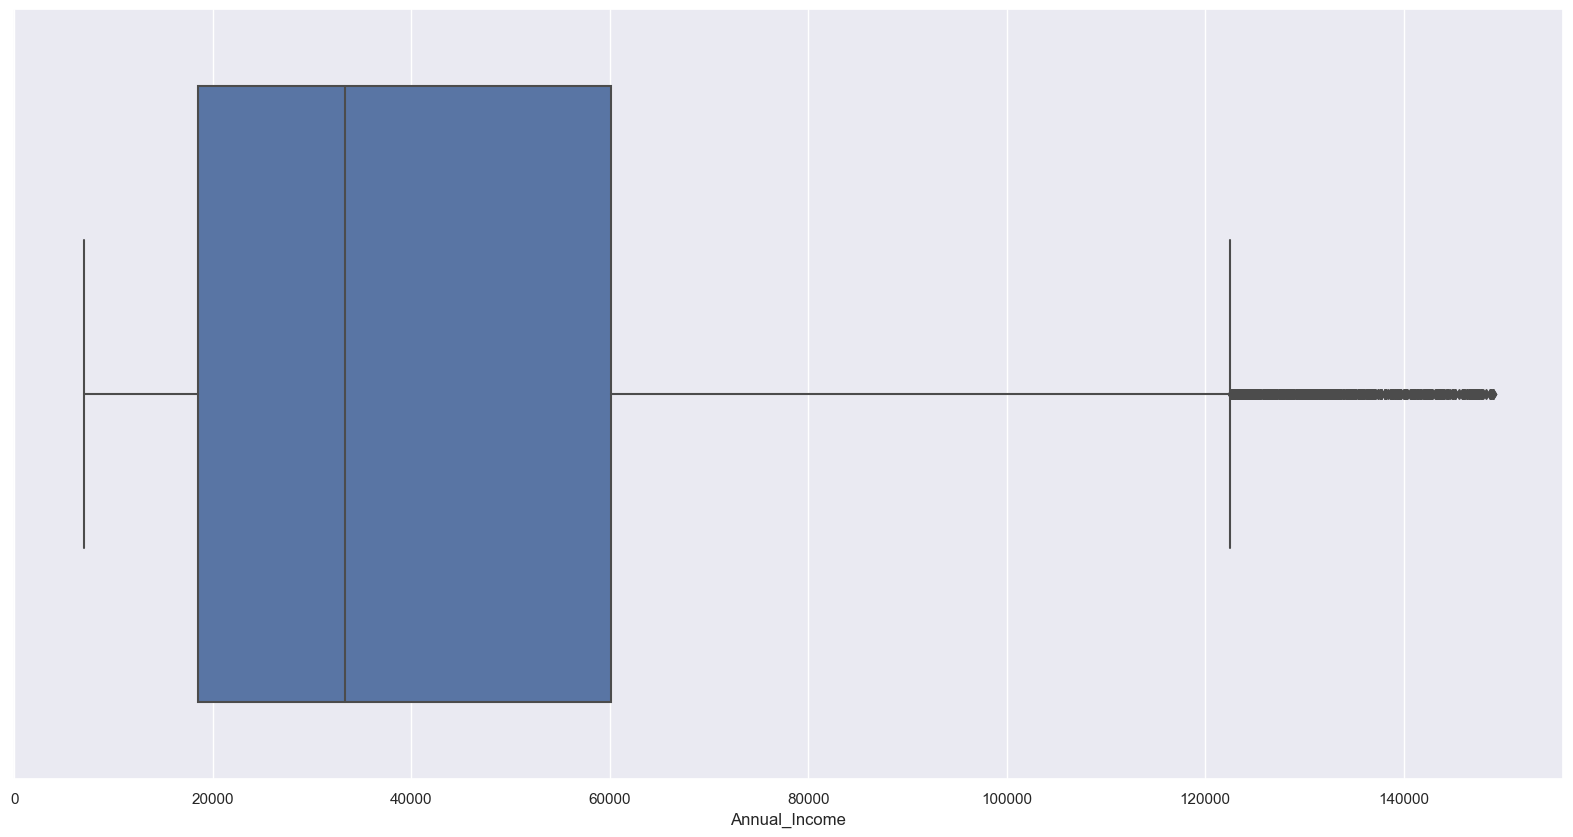

In [2042]:
sns.boxplot(x='Annual_Income',data=df_cleaned)

In [2043]:
Q1 = df_cleaned["Annual_Income"].quantile(0.25)
Q3 = df_cleaned["Annual_Income"].quantile(0.75)
IQR = Q3 -Q1
df_cleaned.drop(df_cleaned[df_cleaned['Annual_Income'] > Q3 + IQR * 1.5].index.values,axis=0,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Annual_Income'] < Q1 - IQR * 1.5].index.values,axis=0,inplace=True)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.08,No,49.574949,High_spent_Small_value_payments,312.494089,Good
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.33,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
5,23.0,Scientist,19114.12,8.0,4.0,809.98,22.50,No,49.574949,Unkown,340.479212,Good
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.58,No,49.574949,Low_spent_Small_value_payments,244.565317,Good
8,28.0,Unknown,34847.84,3.0,4.0,605.03,26.58,No,18.816215,Low_spent_Small_value_payments,470.690627,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...
98296,38.0,Lawyer,41015.55,9.0,1.0,599.40,24.92,No,25.671257,Low_spent_Small_value_payments,346.715084,Standard
98298,38.0,Lawyer,41015.55,9.0,1.0,599.40,25.08,No,25.671257,Low_spent_Small_value_payments,178.327142,Standard
98299,38.0,Lawyer,41015.55,9.0,1.0,599.40,25.17,NM,25.671257,Low_spent_Small_value_payments,192.083554,Standard
98300,38.0,Lawyer,41015.55,9.0,1.0,599.40,25.25,No,25.671257,High_spent_Large_value_payments,453.567775,Standard


<Axes: xlabel='Annual_Income'>

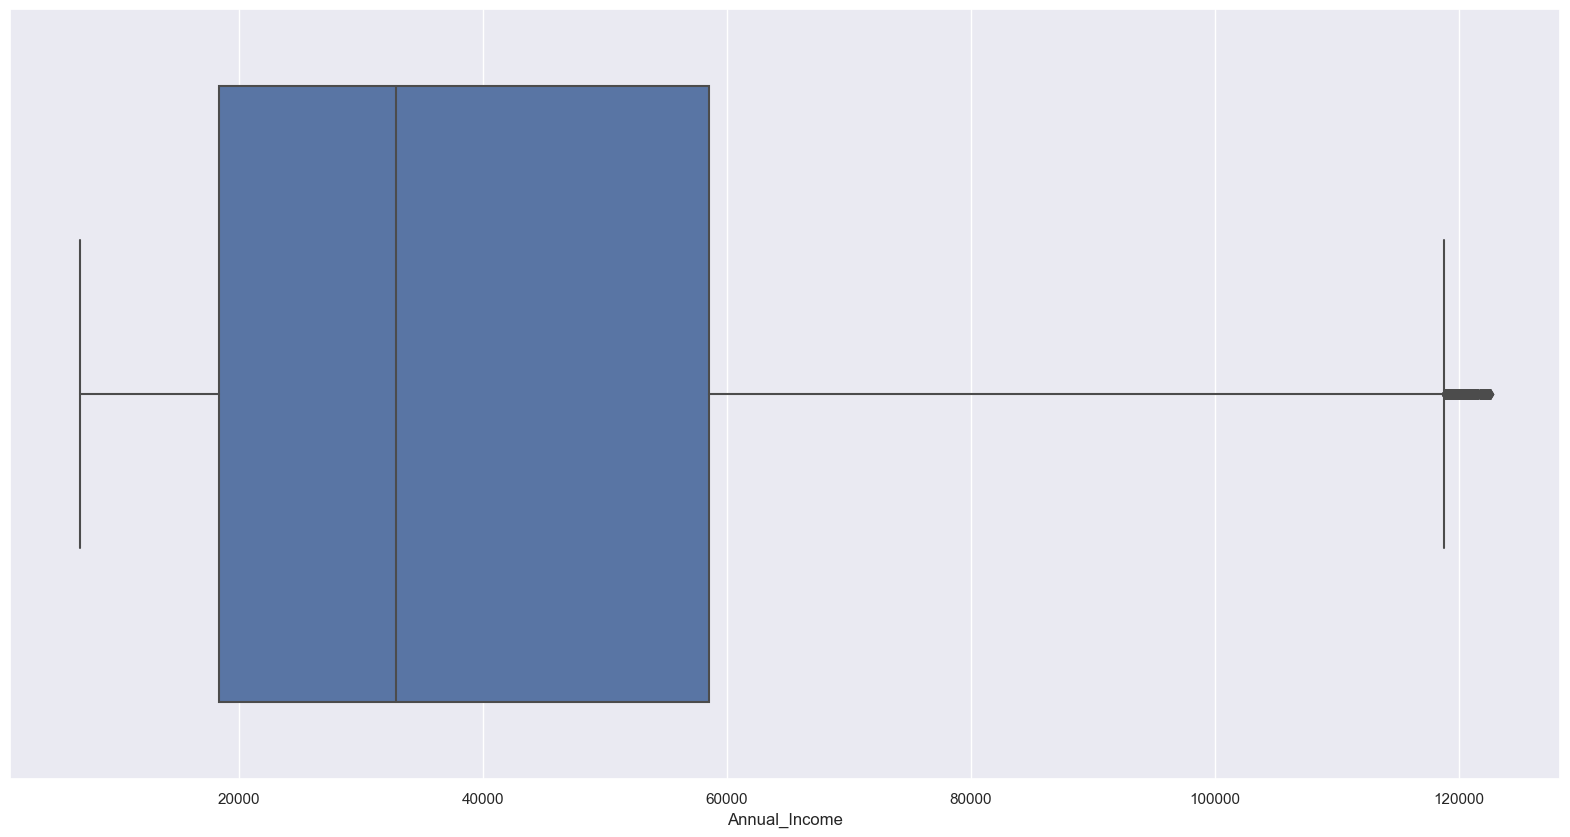

In [2044]:
sns.boxplot(x='Annual_Income',data=df_cleaned)

<Axes: xlabel='Outstanding_Debt'>

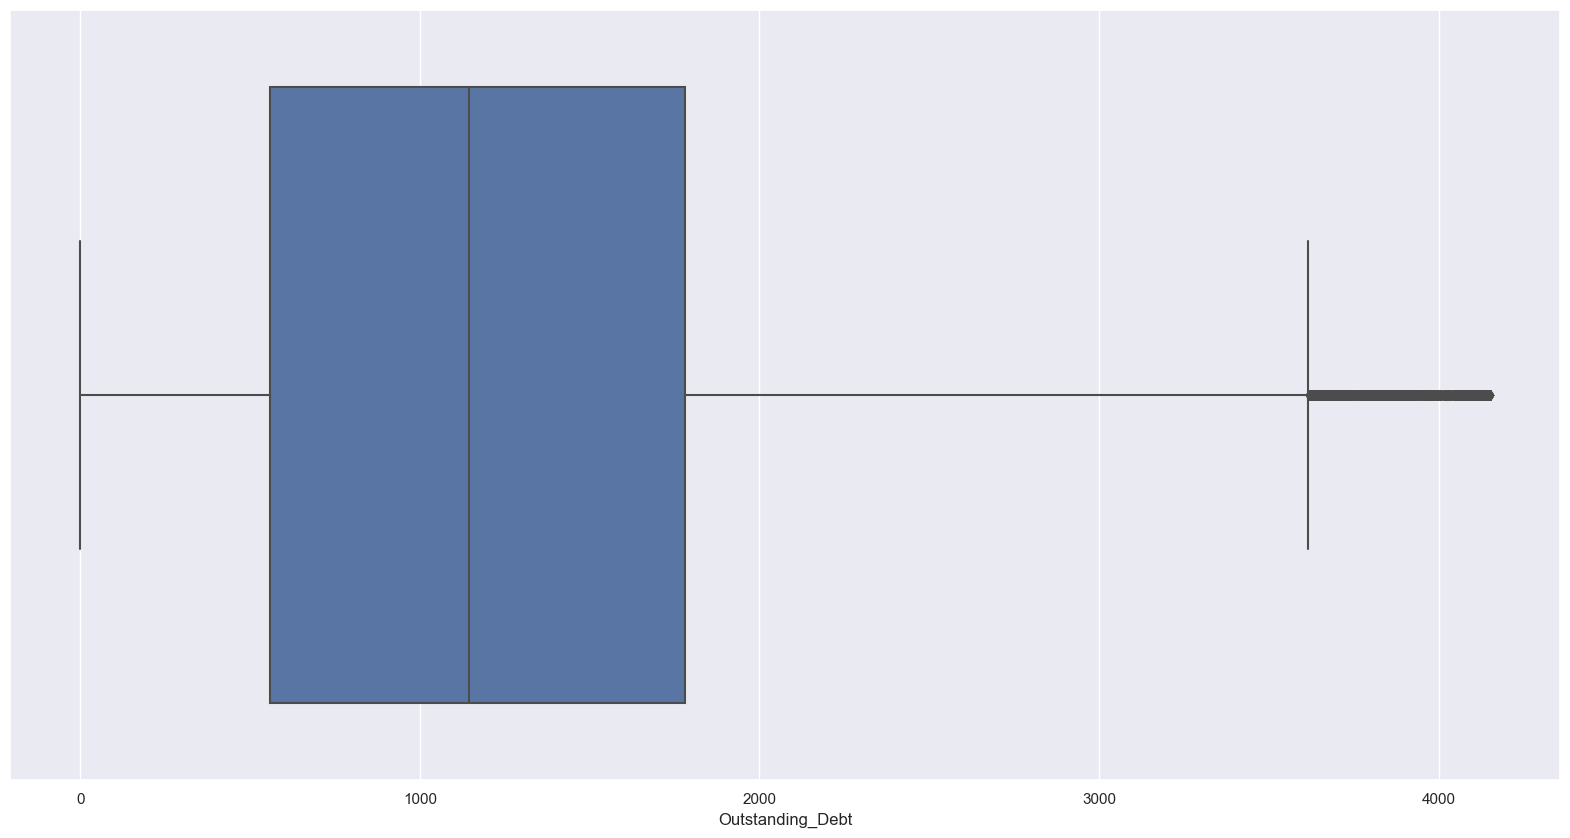

In [2045]:
sns.boxplot(x='Outstanding_Debt',data=df_cleaned)

# Data Visualization

In [2046]:
import matplotlib.pyplot as plt

In [2047]:
occupation_count = df_cleaned['Occupation'].value_counts(dropna=False)
occupation_count.index

Index(['Unknown', 'Lawyer', 'Engineer', 'Architect', 'Journalist', 'Scientist',
       'Entrepreneur', 'Doctor', 'Mechanic', 'Developer', 'Teacher',
       'Accountant', 'MediaManager', 'Writer', 'Manager', 'Musician'],
      dtype='object', name='Occupation')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Lawyer'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Architect'),
  Text(4, 0, 'Journalist'),
  Text(5, 0, 'Scientist'),
  Text(6, 0, 'Entrepreneur'),
  Text(7, 0, 'Doctor'),
  Text(8, 0, 'Mechanic'),
  Text(9, 0, 'Developer'),
  Text(10, 0, 'Teacher'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'MediaManager'),
  Text(13, 0, 'Writer'),
  Text(14, 0, 'Manager'),
  Text(15, 0, 'Musician')])

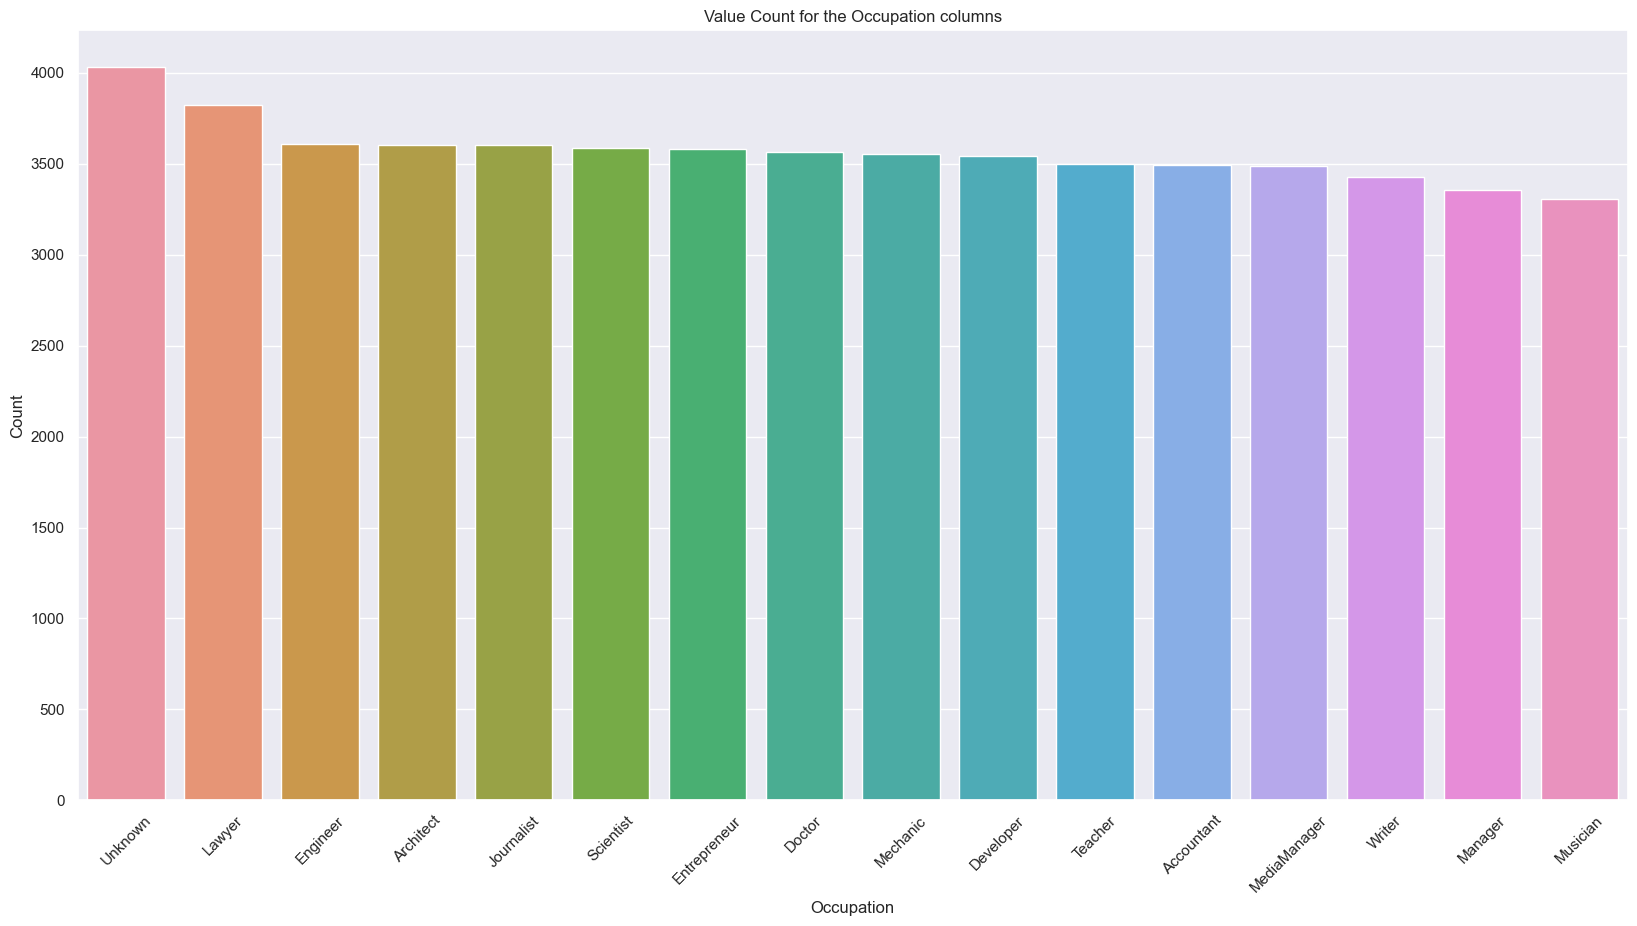

In [2048]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=occupation_count.index.values,y=occupation_count.values)
plt.title("Value Count for the Occupation columns")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Credit Score')

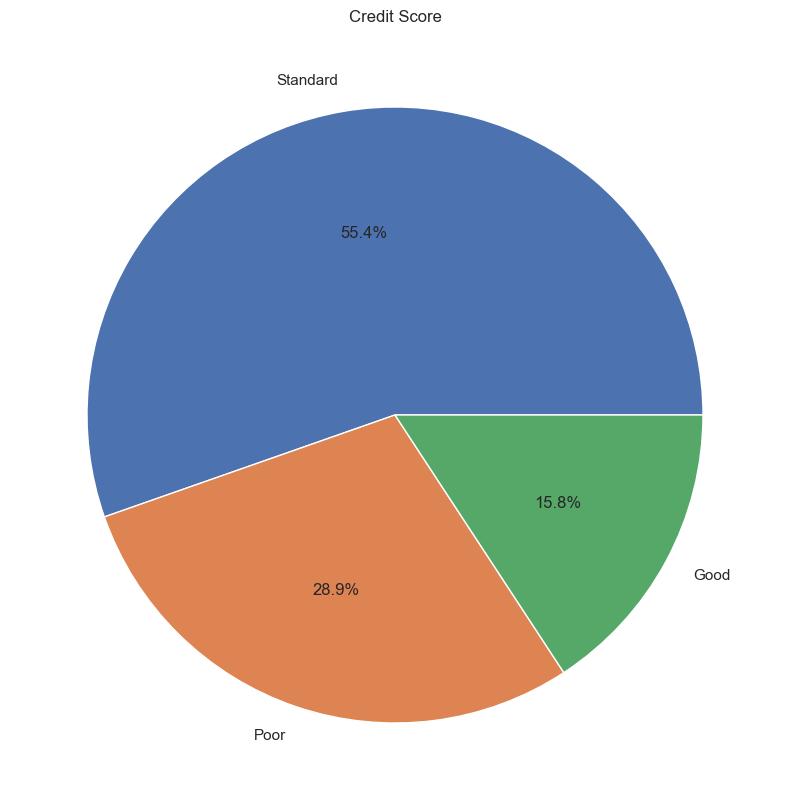

In [2049]:
Credit_count = df_cleaned.Credit_Score.value_counts()
plt.pie(x=Credit_count,labels=Credit_count.index,autopct='%1.1f%%')
plt.title("Credit Score")

Text(0.5, 1.0, 'Correlation Table')

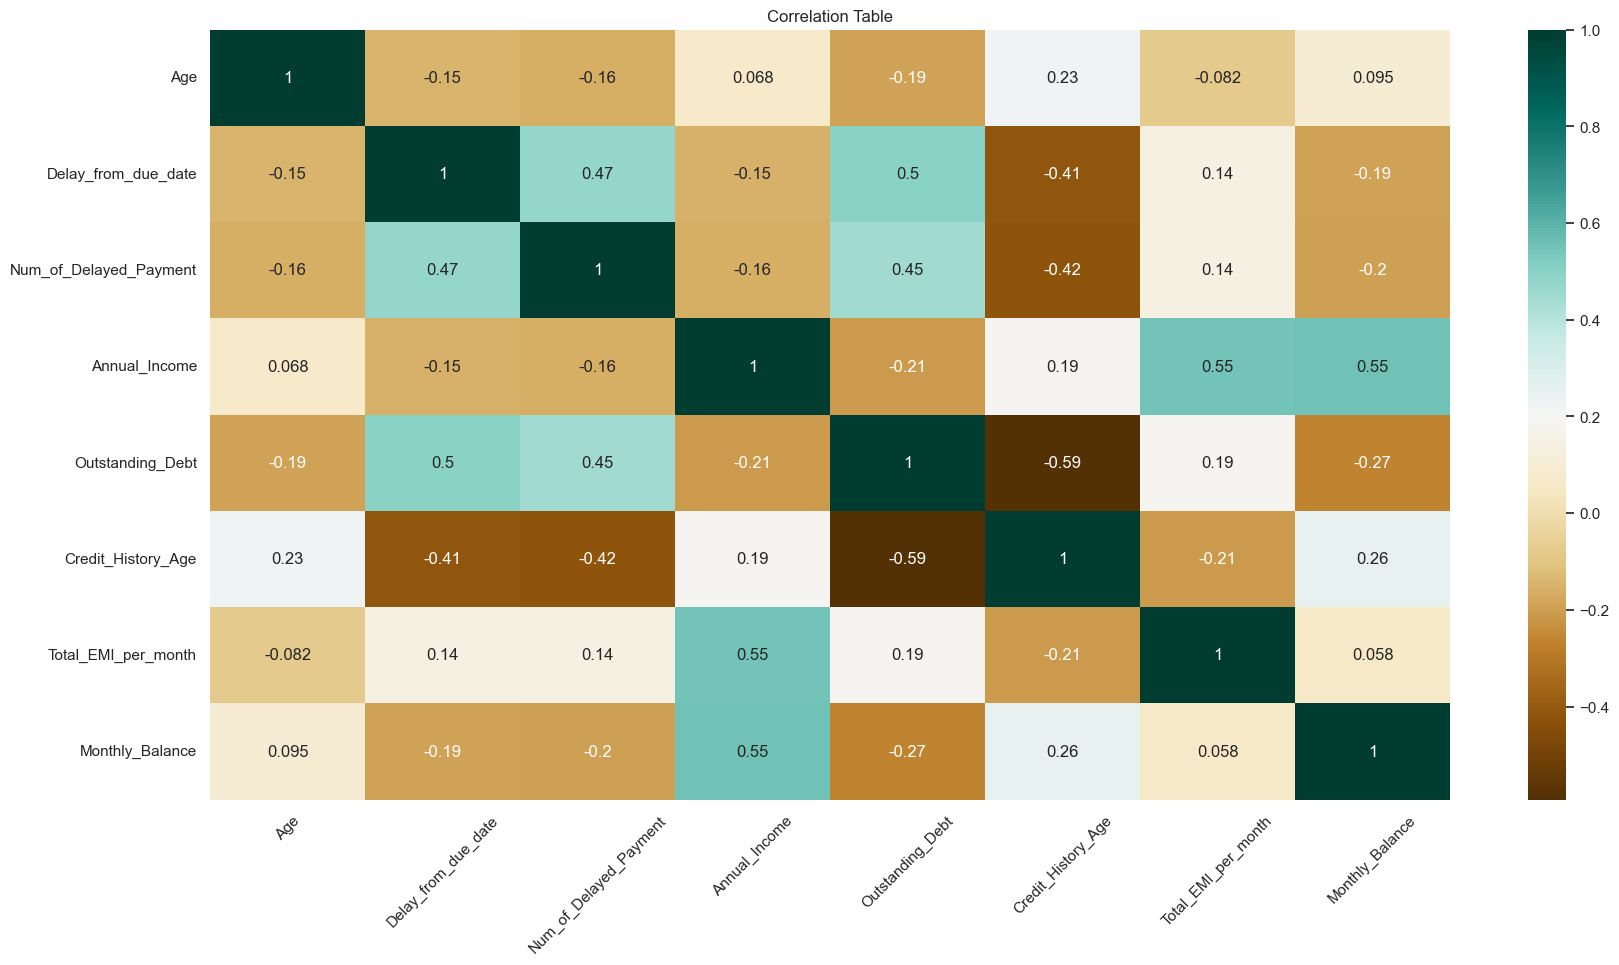

In [2050]:
corr_tb = df_cleaned[num_columns].corr()
sns.heatmap(corr_tb,cmap='BrBG',annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Table')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Monthly_Balance'}>, <Axes: >]],
      dtype=object)

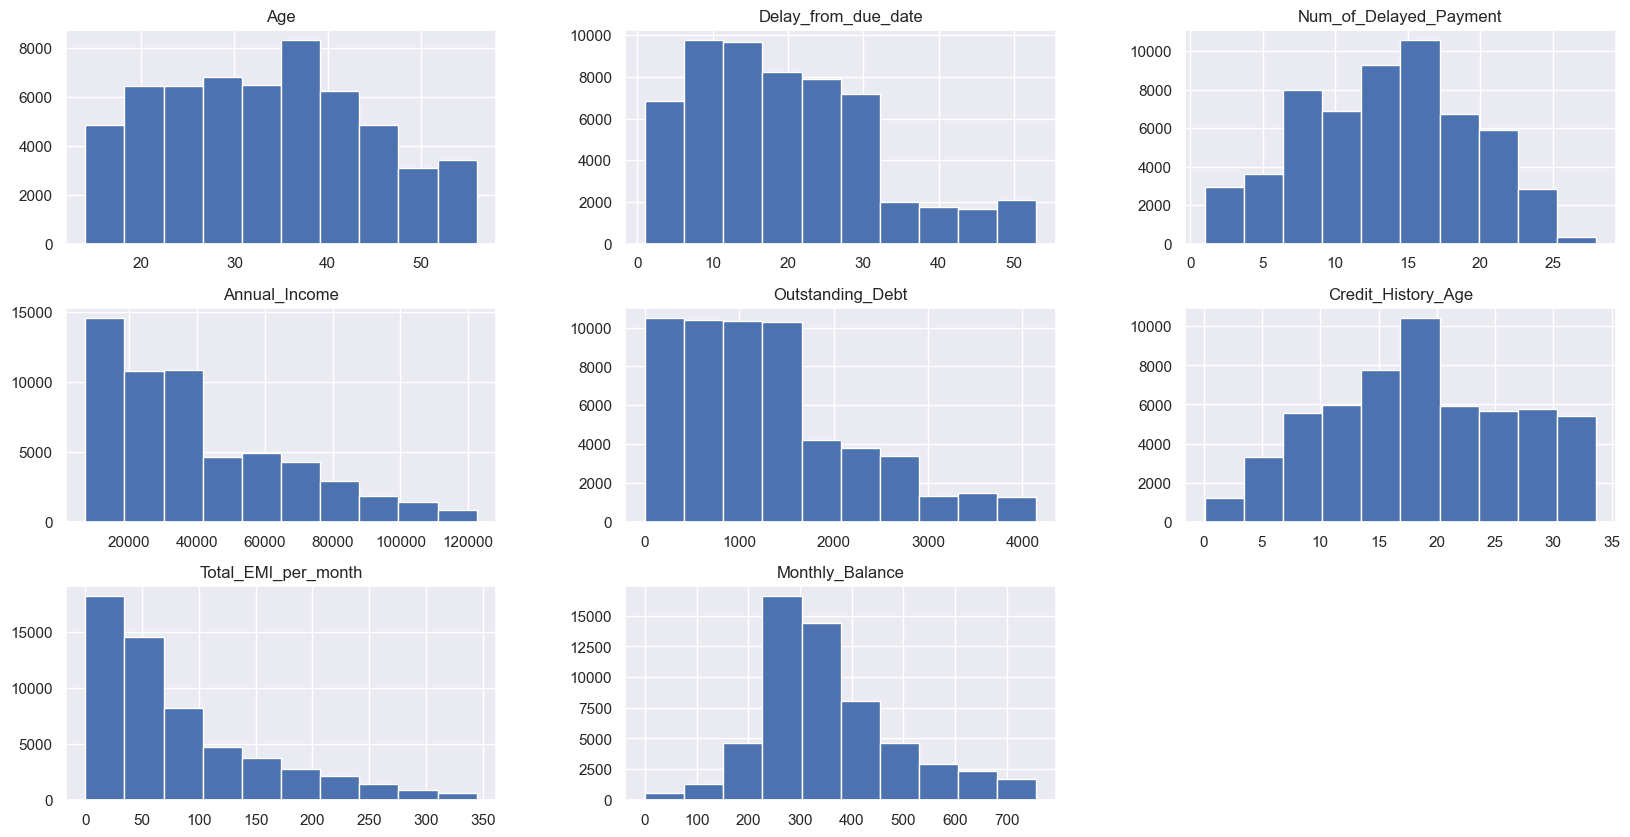

In [2051]:
df_cleaned[num_columns].hist()

# Normalization

In [2052]:
from sklearn.preprocessing import MinMaxScaler

In [2053]:
df_merged.Age.unique()

array(['23', '-500', '28_', ..., '326', '7910', '5826'], dtype=object)

**merge the data II**

In [2054]:
df_merged = pd.concat([df_cleaned,df_test],axis=0)

In [2055]:
scaler = MinMaxScaler()

df_merged.reset_index(drop=True,inplace=True)
df_merged[num_columns] = scaler.fit_transform(df_merged[num_columns])
df_merged.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.001038,Scientist,0.000502,0.030303,0.001364,0.162020,0.648585,No,0.000602,High_spent_Small_value_payments,0.194465,Good
1,0.001038,Scientist,0.000502,0.060606,0.000682,0.162020,0.655955,No,0.000602,Low_spent_Small_value_payments,0.139035,Good
2,0.001038,Scientist,0.000502,0.106061,0.000682,0.162020,0.660967,No,0.000602,Unkown,0.211885,Good
3,0.001038,Scientist,0.000502,0.030303,0.001592,0.162020,0.663325,No,0.000602,Low_spent_Small_value_payments,0.152179,Good
4,0.001614,Unknown,0.001154,0.030303,0.000682,0.121012,0.781250,No,0.000228,Low_spent_Small_value_payments,0.292943,Standard


# Encoding

In [2056]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

** all the data is float data except for the Occupation**

In [2057]:
df_encoded = pd.get_dummies(df_merged,prefix=['Occupation','Payment_Behaviour','Payment_of_Min_Amount'],columns=['Occupation','Payment_Behaviour','Payment_of_Min_Amount'],drop_first=False)
df_encoded.head(5)

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Credit_Score,Occupation_Accountant,...,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unkown,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0.001038,0.000502,0.030303,0.001364,0.162020,0.648585,0.000602,0.194465,Good,False,...,False,False,True,False,False,False,False,False,True,False
1,0.001038,0.000502,0.060606,0.000682,0.162020,0.655955,0.000602,0.139035,Good,False,...,False,False,False,False,False,True,False,False,True,False
2,0.001038,0.000502,0.106061,0.000682,0.162020,0.660967,0.000602,0.211885,Good,False,...,False,False,False,False,False,False,True,False,True,False
3,0.001038,0.000502,0.030303,0.001592,0.162020,0.663325,0.000602,0.152179,Good,False,...,False,False,False,False,False,True,False,False,True,False
4,0.001614,0.001154,0.030303,0.000682,0.121012,0.781250,0.000228,0.292943,Standard,False,...,False,False,False,False,False,True,False,False,True,False


In [2058]:
df_encoded.dropna(inplace=True)

In [2059]:
df_encoded.dtypes

Age                                                   float64
Annual_Income                                         float64
Delay_from_due_date                                   float64
Num_of_Delayed_Payment                                float64
Outstanding_Debt                                      float64
Credit_History_Age                                    float64
Total_EMI_per_month                                   float64
Monthly_Balance                                       float64
Credit_Score                                           object
Occupation_Accountant                                    bool
Occupation_Architect                                     bool
Occupation_Developer                                     bool
Occupation_Doctor                                        bool
Occupation_Engineer                                      bool
Occupation_Entrepreneur                                  bool
Occupation_Journalist                                    bool
Occupati

In [2060]:
label_encoder = LabelEncoder()
df_encoded['Credit_Score'] = label_encoder.fit_transform(df_encoded.Credit_Score)

In [2061]:

indep_var = list(df_encoded.columns)
indep_var.remove('Credit_Score')
x = df_encoded[indep_var]
y= df_encoded['Credit_Score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Modeling

In [2062]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

## DecionTreeClassifier

In [2063]:
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(x_train,y_train)
y_pred = DT_model.predict(x_test)

the accuracy score is: 0.6671632635176584
The Confusion Matrix :
[[1135   29  591]
 [ 276 2021 1077]
 [ 993  832 4457]]


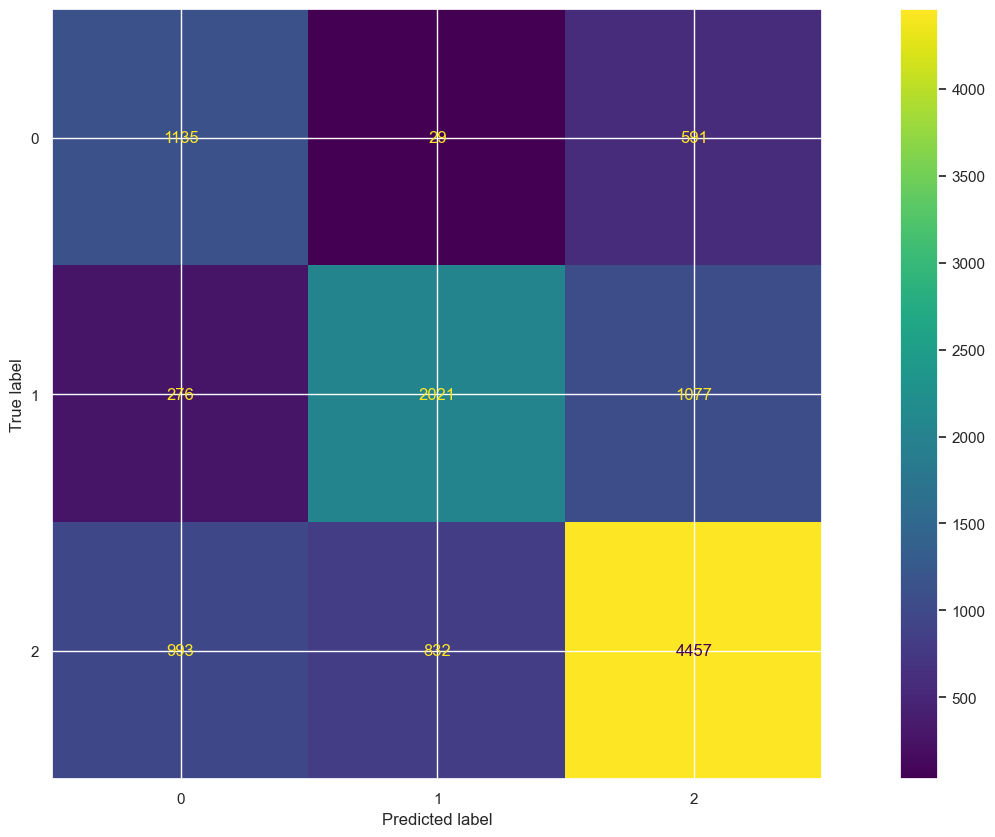

In [2064]:
print(f"the accuracy score is: {DT_model.score(x_test,y_test)}")
print(f"The Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
metrics.ConfusionMatrixDisplay.from_estimator(DT_model,x_test,y_test)

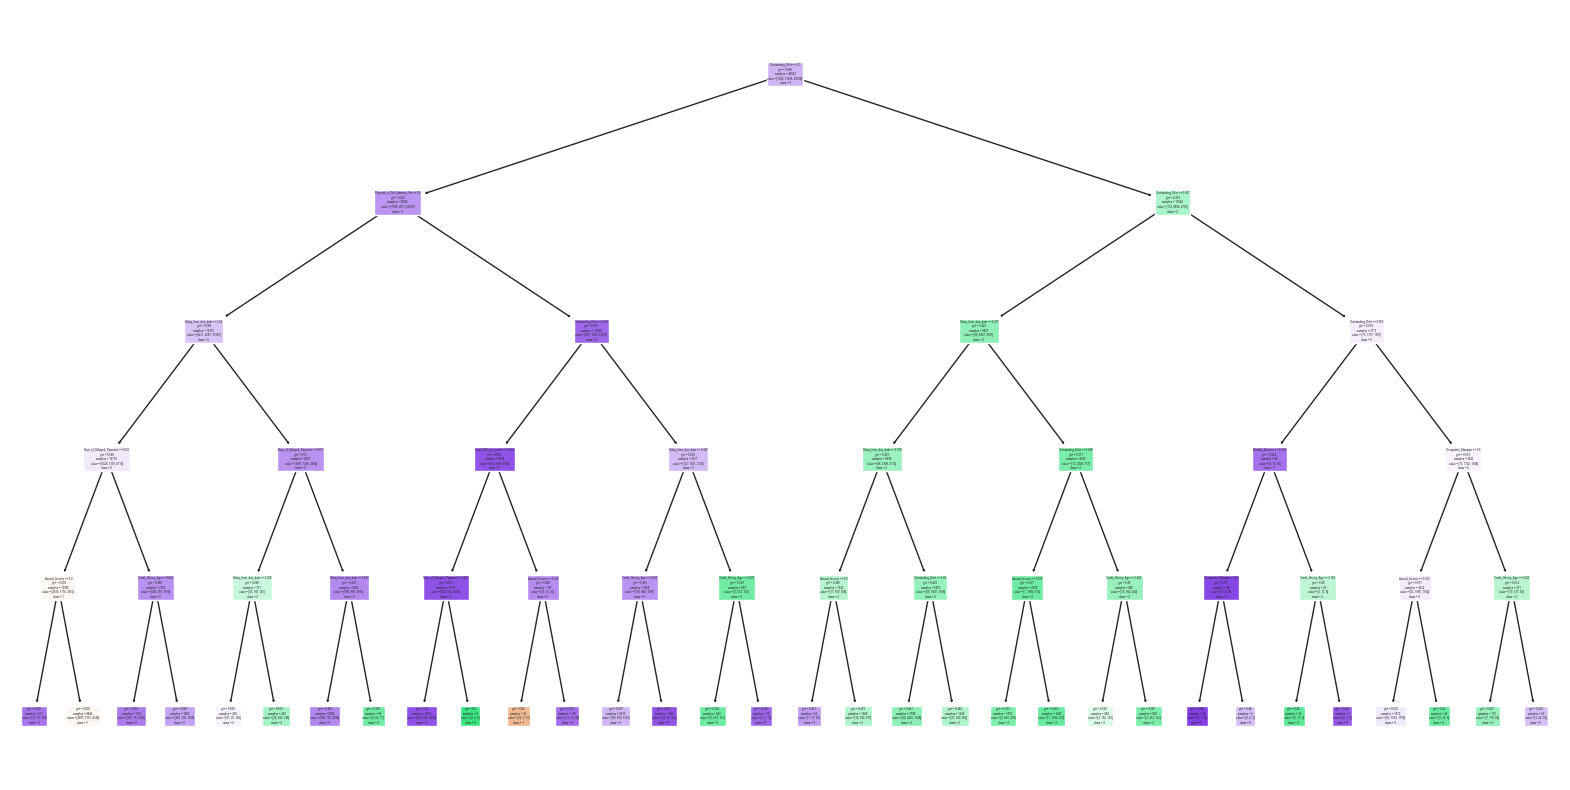

In [2065]:
plot_tree(DT_model,filled=True,feature_names=list(map(str,x_train.columns)),class_names=list(map(str,y_train.unique())))
plt.savefig("ModelVizualisation/decision_tree.png", dpi=700)

## KNeighborsClassifier

In [2066]:
KN_model = KNeighborsClassifier()
KN_model.fit(x_train,y_train)
y_pred = KN_model.predict(x_test)

the accuracy score is: 0.6151082289019367
The Confusion Matrix :
[[ 729  124  902]
 [ 217 2003 1154]
 [ 819 1176 4287]]


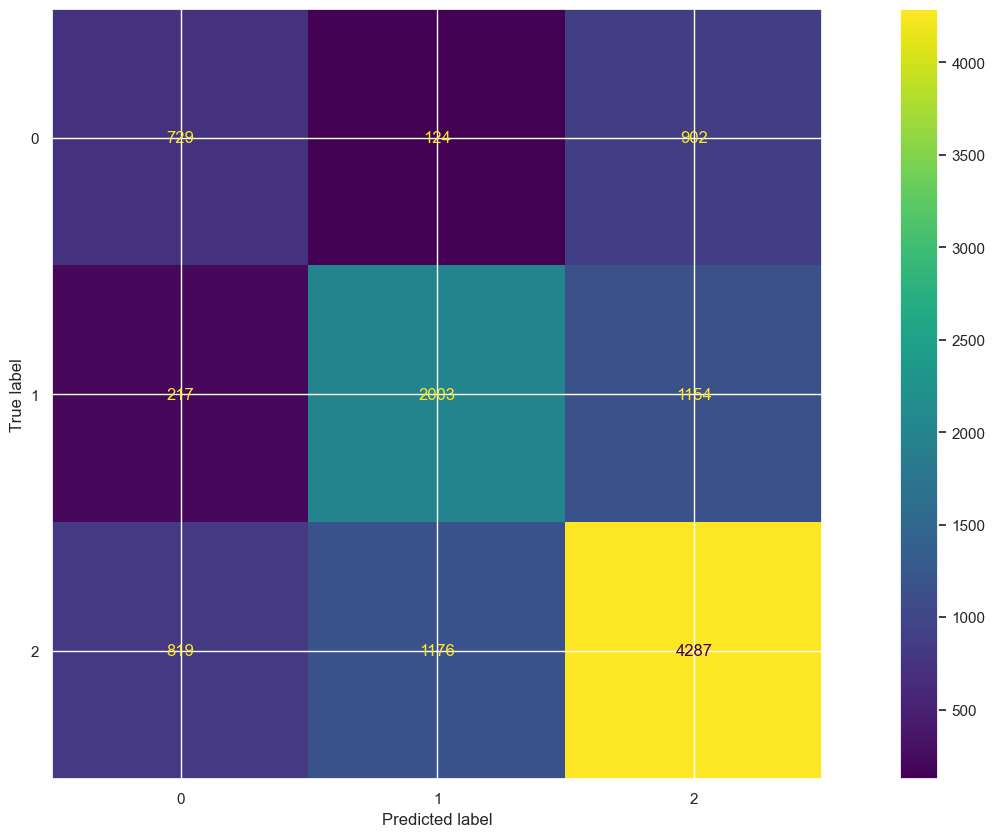

In [2067]:
print(f"the accuracy score is: {KN_model.score(x_test,y_test)}")
print(f"The Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
metrics.ConfusionMatrixDisplay.from_estimator(KN_model,x_test,y_test)

## RandomForrestClassifier

In [2068]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)

the accuracy score is: 0.7749539917623346
The Confusion Matrix :
[[1030    9  716]
 [  61 2624  689]
 [ 351  742 5189]]


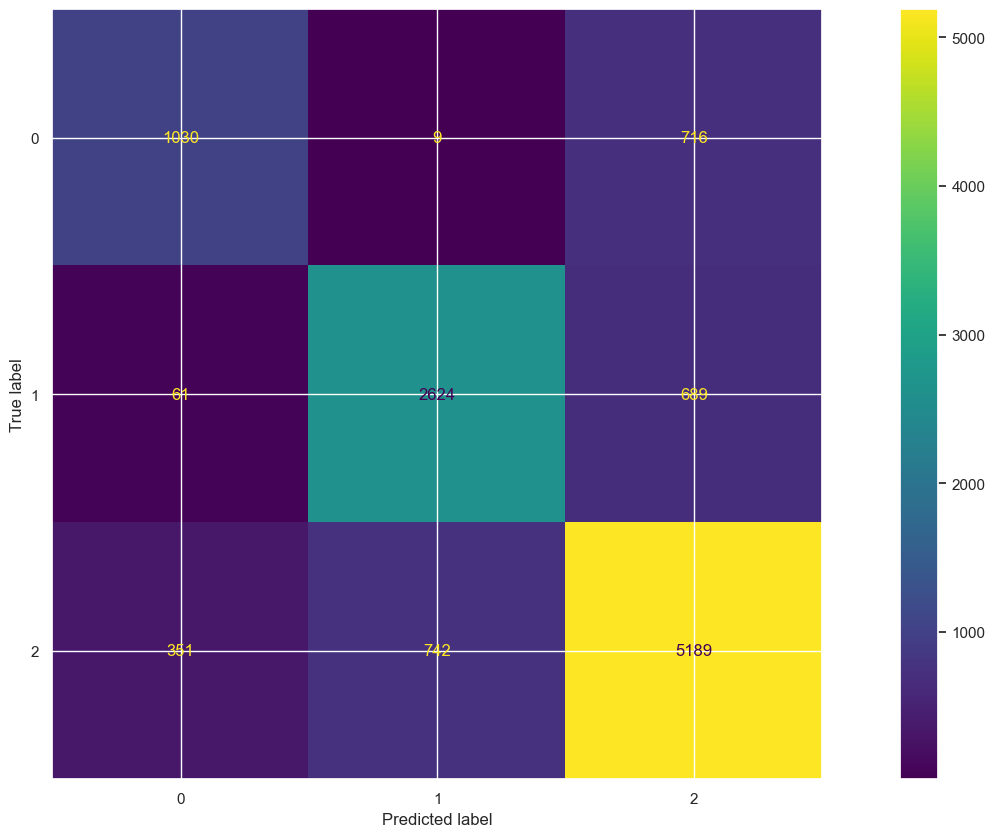

In [2069]:
print(f"the accuracy score is: {RF_model.score(x_test,y_test)}")
print(f"The Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
metrics.ConfusionMatrixDisplay.from_estimator(RF_model,x_test,y_test)